| Name | Surname | ID Number |
|------|---------|---------------------|
| Andrea | Turci | 2106724 |

In [1]:
library("dplyr", warn.conflicts = FALSE, quietly = TRUE)
library("ggplot2", warn.conflicts = FALSE, quietly = TRUE)
library("spatstat", warn.conflicts = FALSE, quietly = TRUE)
library("coda", warn.conflicts = FALSE, quietly = TRUE)
# library("rjags", warn.conflicts = FALSE, quietly = TRUE)
library("gridExtra", warn.conflicts = FALSE, quietly = TRUE)
library(geosphere)
library(Hmisc)
library(rstan)

spatstat.geom 3.2-9

spatstat.random 3.2-3


Attaching package: ‘nlme’


The following object is masked from ‘package:dplyr’:

    collapse


spatstat.explore 3.2-7

spatstat.model 3.2-11

spatstat.linnet 3.1-5


spatstat 3.0-8 
For an introduction to spatstat, type ‘beginner’ 



Attaching package: ‘geosphere’


The following object is masked from ‘package:spatstat.geom’:

    perimeter



Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units


Loading required package: StanHeaders

code for methods in class “Rcpp_model_base” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for methods in class “Rcpp_model_base” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for methods in class “Rcpp_stan_fit” was not checked for suspicious field assignments (rec

# Exercise 1

y death soldiers 0 1 2 3 4 ≥ 5
n1 observations 109 65 22 3 1 0
n2 observations 144 91 32 11 2 0

A study on water quality of streams, a high level of bacter X was defined as a level greater than 100
per 100 ml of stream water. n = 116 samples were taken from streams having a high environmental
impact on pandas. Out of these, y = 11 had a high bacter X level.
• indicating with p the probability that a sample of water taken from the stream has a high bacter
X level,
(a) find the frequentist estimator for p
(b) using a Beta(1, 10) prior for p, calculate and posterior distribution P(p

 y)

Ladislaus Josephovich Bortkiewicz was a Russian economist and statistician. He noted that the Poisson distribution can be very useful in applied statistics when describing low-frequency events in a large population. In a famous example he showed that the number of deaths by horse kick among the Prussian army follows the Poisson distribution.

Considering the following two sets of observations taken over a fixed large time interval in two different corps:

| y - death soldiers | 0 | 1 | 2 | 3 | 4 | $\geq$ 5 | 
|--------------------|---|---|---|---|---|---|
| n1 - observations | 109 | 65 | 22 | 3 | 1 | 0 | 
| n2 - observations | 144 | 91 | 32 | 11 | 2 | 0 | 

(a) Assuming a uniform prior, compute and plot the posterior distribution for $\lambda$, the death rate over the measurement time. Determine the posterior mean, median and variance, and compute the 95% credibility interval.

In [2]:
y <- c(0, 1, 2, 3, 4, ">=5")
n1 <- c(109, 65, 22, 3, 1, 0)
n2 <- c(144, 91, 32, 11, 2, 0)

combined_obs <- n1 + n2

total_counts <- sum(combined_obs)
total_deaths <- sum(c(0, 1, 2, 3, 4, 5) * combined_obs)

In [3]:
lambda <- seq(0.001, 1, 0.001)
post_values <- dgamma(lambda, shape = total_deaths + 1, rate = total_counts)
post_values <- post_values / sum(post_values)

options(repr.plot.width = 8, repr.plot.height = 8)

The mean is 0.6645833 
The standard deviation is 0.001395138 
The median is 0.6635 
95% credibility interval is ( 0.594375 ; 0.739625 ) 


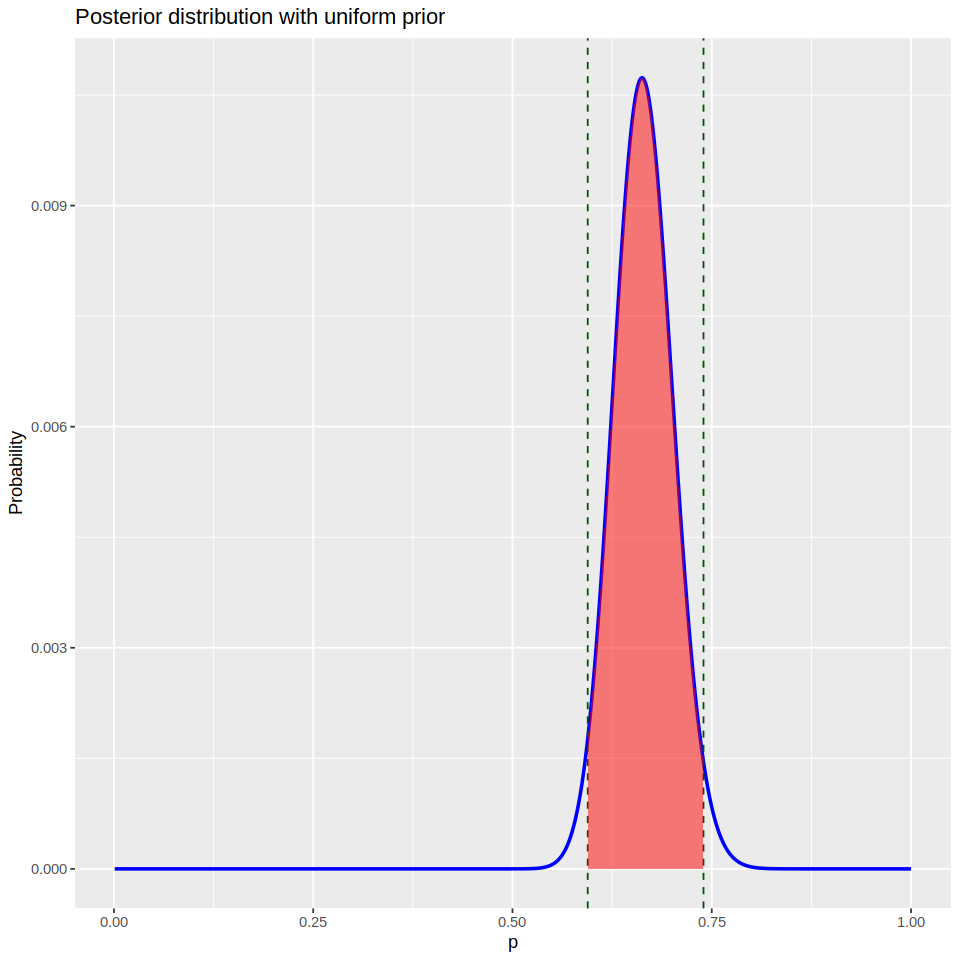

In [4]:
mean <- wtd.mean(lambda, post_values, normwt = TRUE)
var <- wtd.var(lambda, post_values, normwt = TRUE)
median <- weighted.median(lambda, post_values)
quantiles <- wtd.quantile(lambda, post_values, c(0.025, 0.975), normwt = TRUE)

cat("The mean is", mean, '\n')
cat("The standard deviation is", var,'\n')
cat("The median is", median,'\n')
cat("95% credibility interval is (", quantiles[1], ";", quantiles[2], ")", "\n")

ggplot(data = data.frame(lambda, post_values), aes(x = lambda, y = post_values)) +
  # geom_point(color = "red", size = 1.5) +
  geom_line(color = "blue", linewidth = 1) +
  # geom_vline(xintercept = mean_bayes,
  #            linetype = "dashed", color = "blue") +
  geom_vline(xintercept = quantiles[1],
             linetype = "dashed", color = "#035003") +
  geom_vline(xintercept = quantiles[2],
             linetype = "dashed", color = "#035003") +

  geom_ribbon(data = subset(data.frame(lambda, post_values),
                            lambda >= (quantiles[1]) & lambda <= (quantiles[2])),
              aes(ymin = 0, ymax = post_values),
              fill = "red", alpha = 0.5) +
  labs(title = "Posterior distribution with uniform prior",
       x = "p",
       y = "Probability")

(b) Assuming now a Jeffreys’ prior, $g(\lambda) \propto \frac{1}{\sqrt{\lambda}}$, with $\lambda > 0$, compute and plot the posterior distribution for $\lambda$, the death rate over the measurement time. Determine the posterior mean, median and variance, and compute the 95% credibility interval

In [5]:
likelihood <- dgamma(lambda, shape = total_deaths + 1, rate = total_counts)
prior_f <- function(lambda) {
    return(1/sqrt(lambda))
}
post_values_1 <- prior_f(lambda) * likelihood
post_values_1 <- post_values_1 / sum(post_values_1)

options(repr.plot.width = 8, repr.plot.height = 8)

The mean is 0.6635417 
The standard deviation is 0.00139296 
The median is 0.6625 
95% credibility interval is ( 0.593375 ; 0.738625 ) 


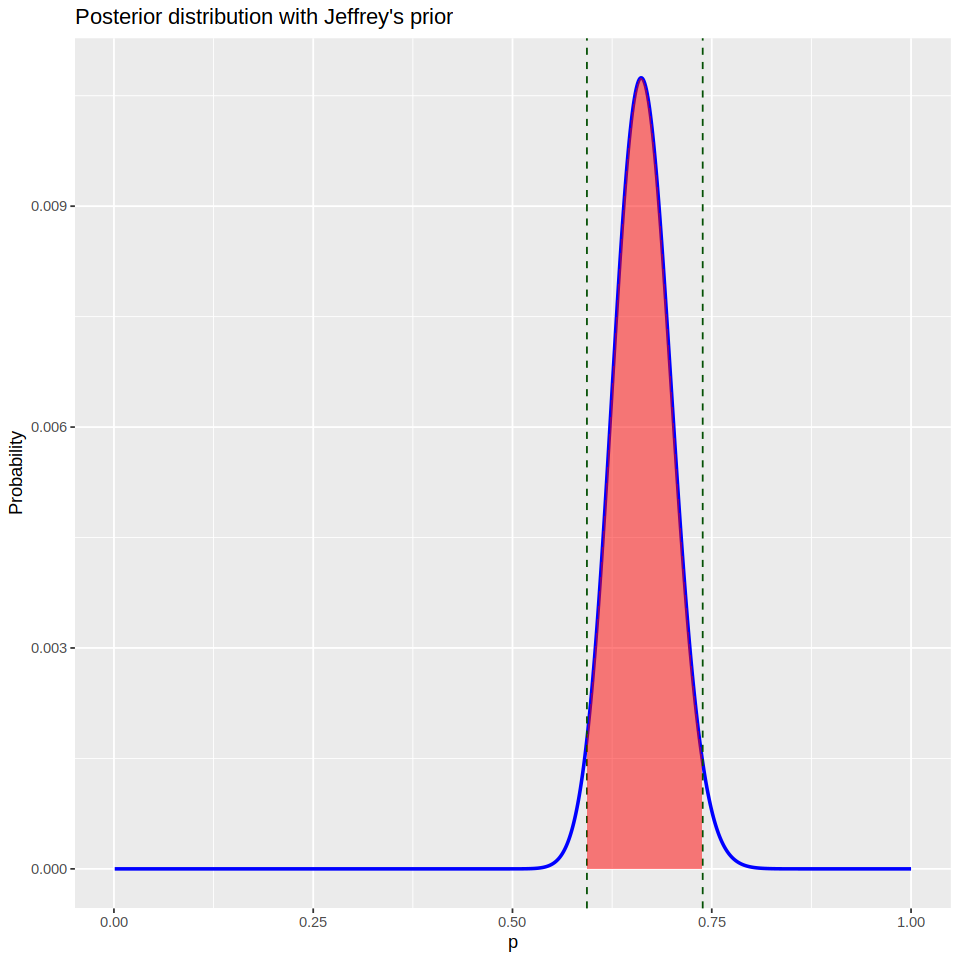

In [6]:
mean <- wtd.mean(lambda, post_values_1, normwt = TRUE)
var <- wtd.var(lambda, post_values_1, normwt = TRUE)
median <- weighted.median(lambda, post_values_1)
quantiles_1 <- wtd.quantile(lambda, post_values_1, c(0.025, 0.975), normwt = TRUE)

cat("The mean is", mean, '\n')
cat("The standard deviation is", var,'\n')
cat("The median is", median,'\n')
cat("95% credibility interval is (", quantiles_1[1], ";", quantiles_1[2], ")", "\n")

ggplot(data = data.frame(lambda, post_values_1), aes(x = lambda, y = post_values_1)) +
  # geom_point(color = "red", size = 1.5) +
  geom_line(color = "blue", linewidth = 1) +
  # geom_vline(xintercept = mean_bayes,
  #            linetype = "dashed", color = "blue") +
  geom_vline(xintercept = quantiles_1[1],
             linetype = "dashed", color = "#035003") +
  geom_vline(xintercept = quantiles_1[2],
             linetype = "dashed", color = "#035003") +

  geom_ribbon(data = subset(data.frame(lambda, post_values_1),
                            lambda >= (quantiles_1[1]) & lambda <= (quantiles_1[2])),
              aes(ymin = 0, ymax = post_values_1),
              fill = "red", alpha = 0.5) +
  labs(title = "Posterior distribution with Jeffrey's prior",
       x = "p",
       y = "Probability")

# Exercise 2

Solve Exercise 1 using a Markov Chain Monte Carlo using $\textbf{stan}$.

In [7]:
occurrencies <- rep(0:5, combined_obs)
data_list <- list(y = occurrencies, N = length(occurrencies))

In [8]:
model_string_uniform <- "data {
  int N;
  array[N] int y;
}
parameters {
  real lambda;
}
model {
  lambda ~ beta(1, 1);
  y ~ poisson(lambda);
}"

writeLines(model_string_uniform, "model_string_uniform.stan")

In [9]:
mod <- stan_model("model_string_uniform.stan")

In [10]:
fit <- sampling(
  object = mod,
  data = data_list,
  seed = 123,
  chains = 4,
  iter = 1000,
  warmup = 200,
  thin = 1
)


code for methods in class “Rcpp_stan_fit4model206177c3b7b9_” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for methods in class “Rcpp_stan_fit4model206177c3b7b9_” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)




SAMPLING FOR MODEL 'anon_model' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 5.4e-05 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.54 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:   1 / 1000 [  0%]  (Warmup)
Chain 1: Iteration: 100 / 1000 [ 10%]  (Warmup)
Chain 1: Iteration: 200 / 1000 [ 20%]  (Warmup)
Chain 1: Iteration: 201 / 1000 [ 20%]  (Sampling)
Chain 1: Iteration: 300 / 1000 [ 30%]  (Sampling)
Chain 1: Iteration: 400 / 1000 [ 40%]  (Sampling)
Chain 1: Iteration: 500 / 1000 [ 50%]  (Sampling)
Chain 1: Iteration: 600 / 1000 [ 60%]  (Sampling)
Chain 1: Iteration: 700 / 1000 [ 70%]  (Sampling)
Chain 1: Iteration: 800 / 1000 [ 80%]  (Sampling)
Chain 1: Iteration: 900 / 1000 [ 90%]  (Sampling)
Chain 1: Iteration: 1000 / 1000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.018 seconds (Warm-up)
Chain 1:                0.031 seconds (Sampling)
Chain 1:                0.049 sec

In [11]:
print(fit,pars = c("lambda"), probs = c(0.025, 0.975), digits = 4)

Inference for Stan model: anon_model.
4 chains, each with iter=1000; warmup=200; thin=1; 
post-warmup draws per chain=800, total post-warmup draws=3200.

         mean se_mean     sd   2.5%  97.5% n_eff   Rhat
lambda 0.6647  0.0011 0.0367 0.5944 0.7359  1103 1.0014

Samples were drawn using NUTS(diag_e) at Fri May 31 14:56:54 2024.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


ci_level: 0.8 (80% intervals)

outer_level: 0.95 (95% intervals)



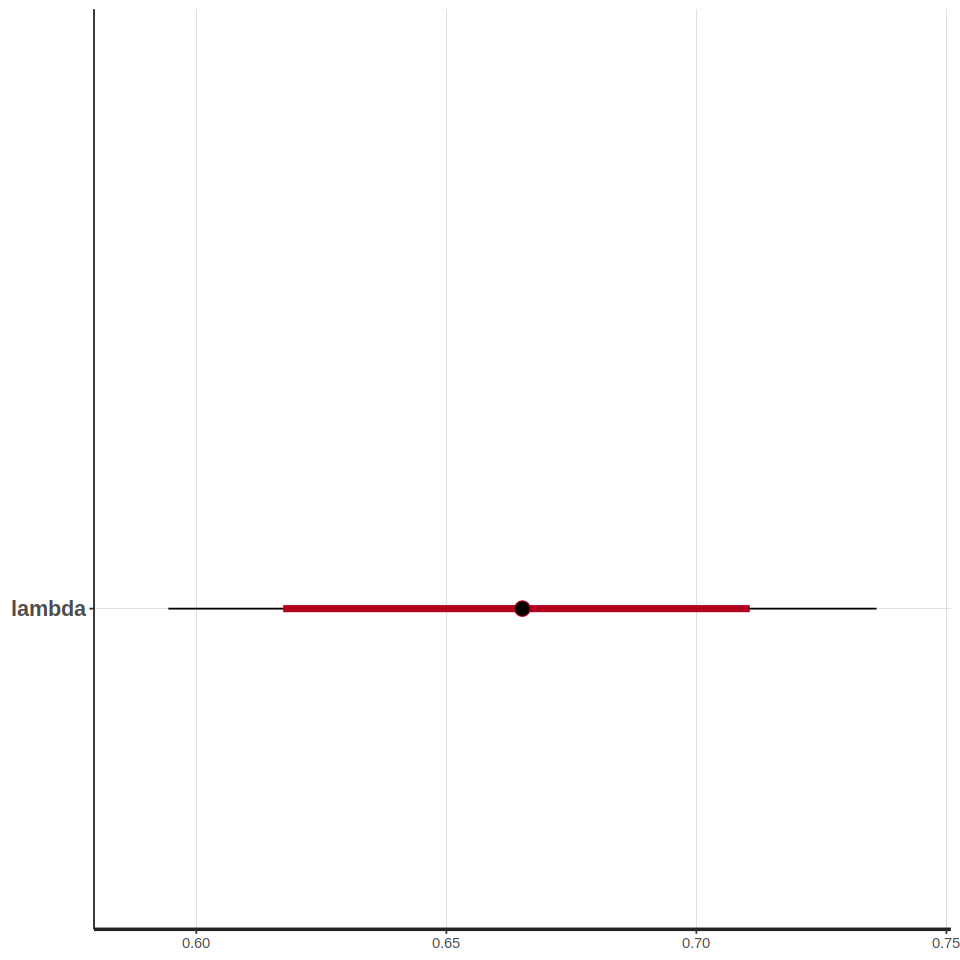

In [12]:
plot(fit,pars=c("lambda"))

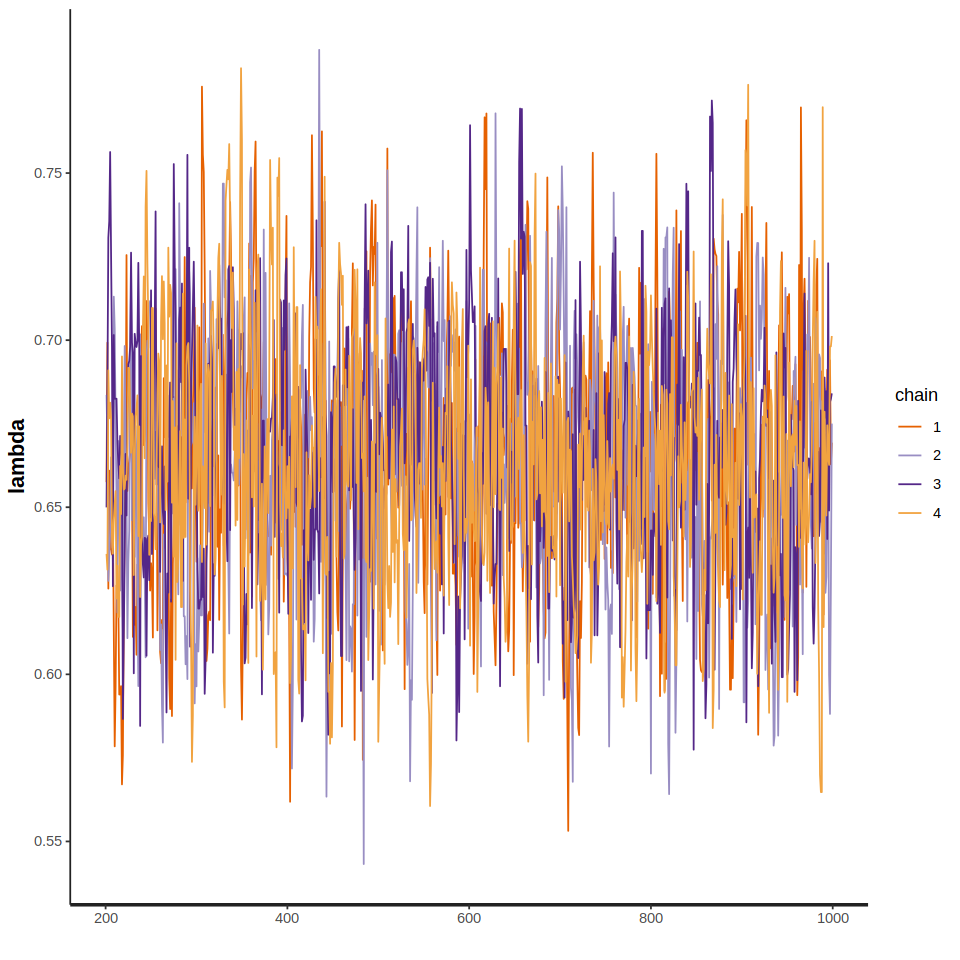

In [13]:
rstan::traceplot(fit,pars=c("lambda"))

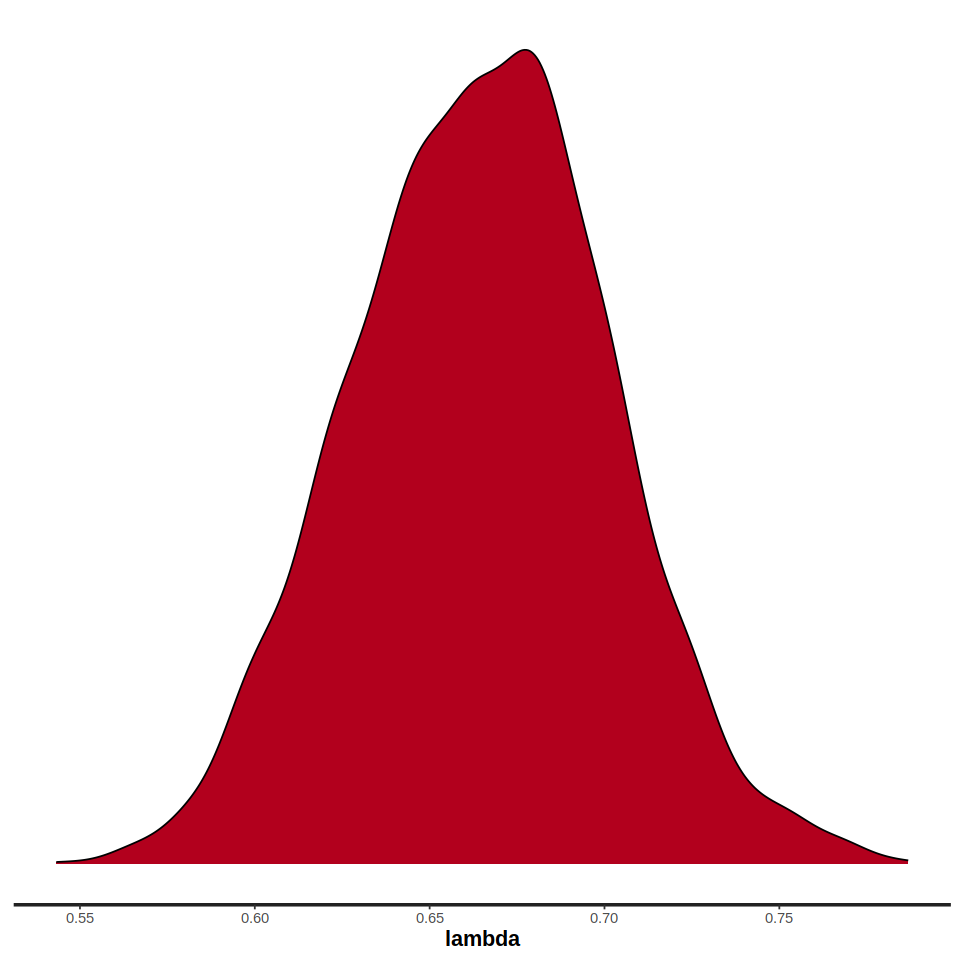

In [14]:
stan_dens(fit)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


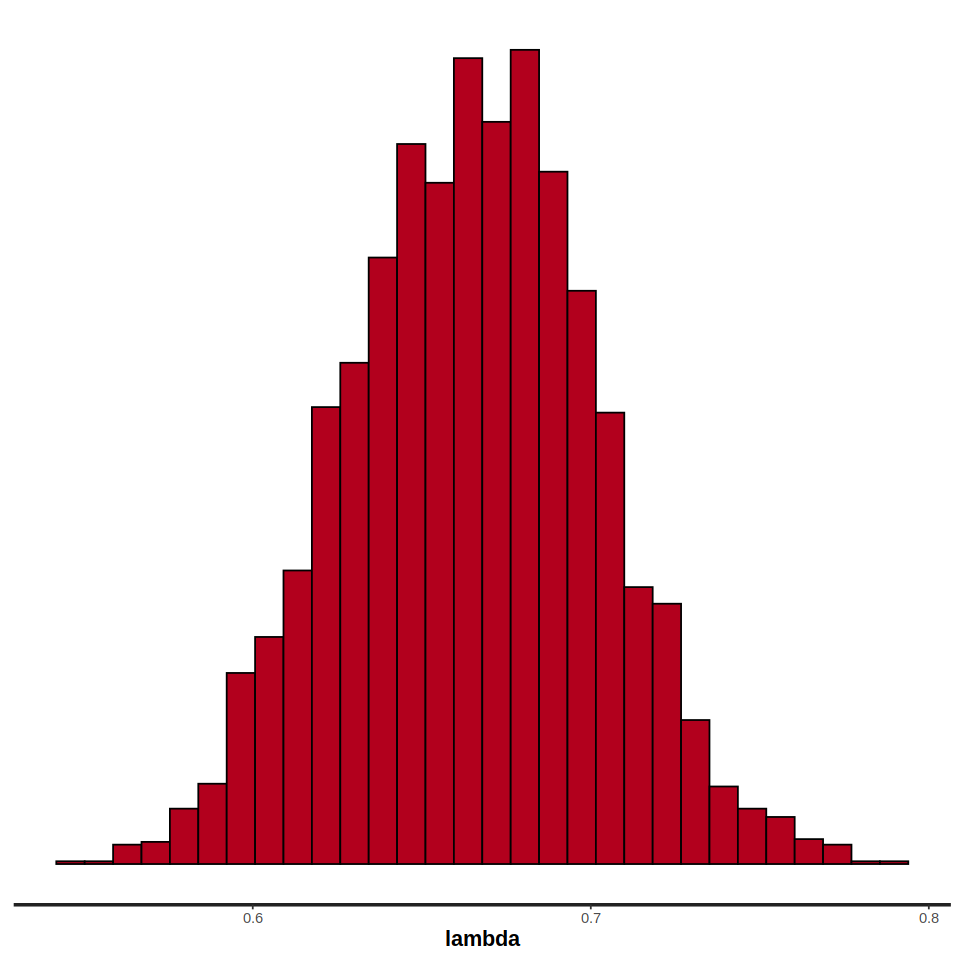

In [15]:
stan_hist(fit)

# Exercise 3

A study on water quality of streams, a high level of bacter X was defined as a level greater than 100 per 100 ml of stream water. $n=116$ samples were taken from streams having a high environmental impact on pandas. Out of these, $y=11$ had a high bacter X level.

Indicating with $p$ the probability that a sample of water taken from the stream has a high bacter X level:

(a) Find the frequentist estimator for $p$

In [16]:
y <- 11
n <- 116

p <- y/n

mean_freq <- p
var_freq <- (p*(1-p))/n

cat("The frequentist mean is", mean_freq, '\n')
cat("The frequentist variance is", var_freq)

The frequentist mean is 0.09482759 
The frequentist variance is 0.0007399596

(b) Using a Beta(1,10) prior for $p$, calculate and plot the posterior distribution $P(p|y)$

(c) Find the bayesian estimator for $p$, the posterior mean and variance, and a 95% credible interval



The bayesian mean is 0.09448819 
The bayesian variance is 0.0007150888

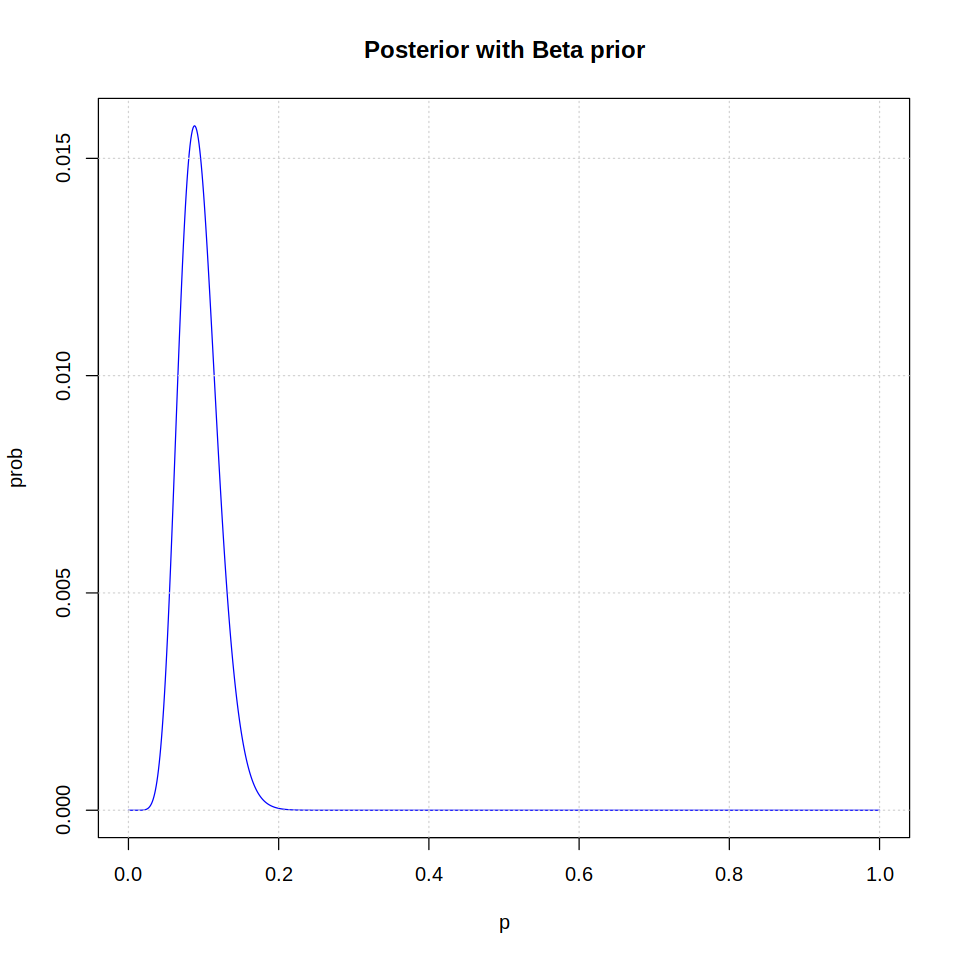

In [17]:
a <- 1
b <- 10

a_prime <- a + y
b_prime <- b + n - y

p <- seq(0, 1, 0.001)
beta_post <- dbeta(p, a_prime, b_prime)

beta_post <- beta_post / sum(beta_post)

p_freq <- y/n

mean_bayes <- a_prime/(a_prime + b_prime)
variance_bayes <- (1/(n+2))**2 * n * p_freq * (1-p_freq)

cat("The bayesian mean is", mean_bayes, '\n')
cat("The bayesian variance is", variance_bayes)

plot(p, beta_post, type = "l", col = "blue", xlab = "p", ylab = "prob", main = "Posterior with Beta prior")
grid()

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


95% credibility interval is ( 0.05 ; 0.151 ) 


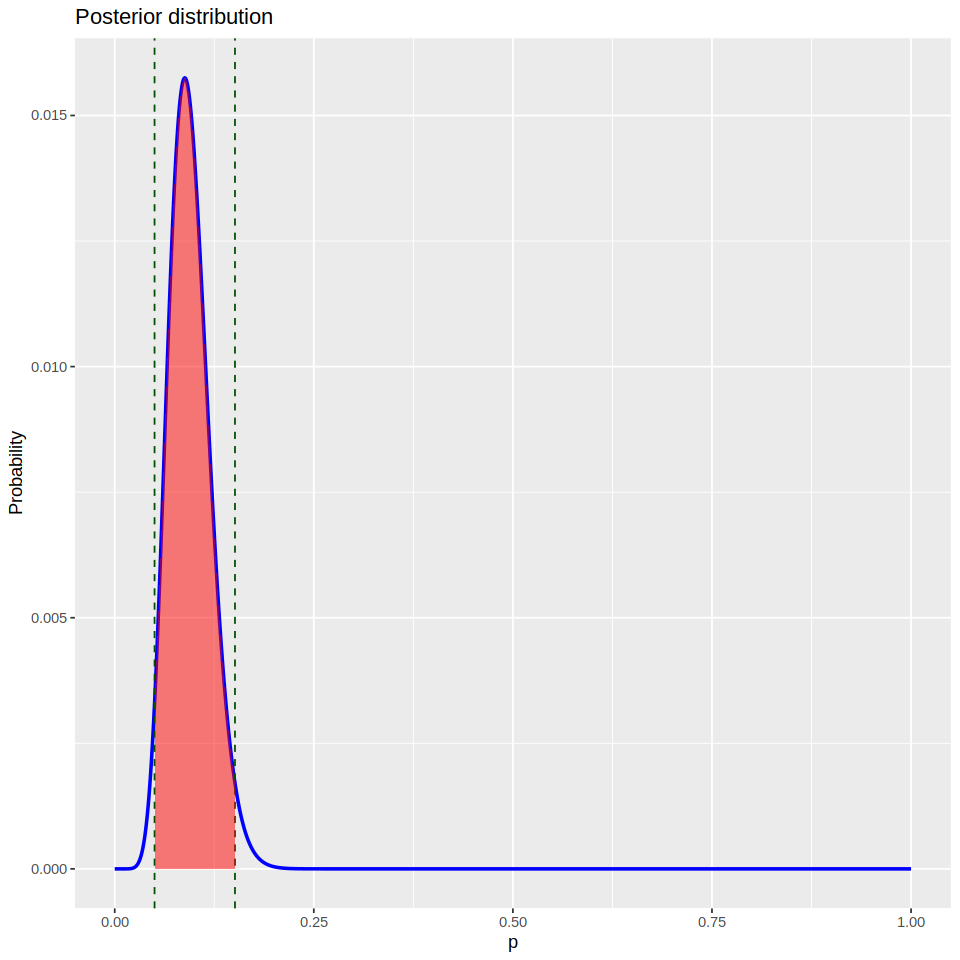

In [18]:
quantiles <- wtd.quantile(p, beta_post, c(0.025, 0.975), normwt = TRUE)

cat("95% credibility interval is (", quantiles[1], ";", quantiles[2], ")", "\n")

ggplot(data = data.frame(p, beta_post), aes(x = p, y = beta_post)) +
  # geom_point(color = "red", size = 1.5) +
  geom_line(color = "blue", linewidth = 1) +
  # geom_vline(xintercept = mean_bayes,
  #            linetype = "dashed", color = "blue") +
  geom_vline(xintercept = quantiles[1],
             linetype = "dashed", color = "#035003") +
  geom_vline(xintercept = quantiles[2],
             linetype = "dashed", color = "#035003") +

  geom_ribbon(data = subset(data.frame(p, beta_post),
                            p >= (quantiles[1]) & p <= (quantiles[2])),
              aes(ymin = 0, ymax = beta_post),
              fill = "red", alpha = 0.5) +
  labs(title = "Posterior distribution ",
       x = "p",
       y = "Probability")

(d) Test the hypotesis

$H_0 : p = 0.1$ versus $H_1 : p \neq 0.1$

at 5% level of significance with both the frequentist and bayesian approach

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


The p-value is 85.26837 %, which is more than the 5% threshold. 
Thus, we cannot reject the null hypothesis based on the frequentist analysis.


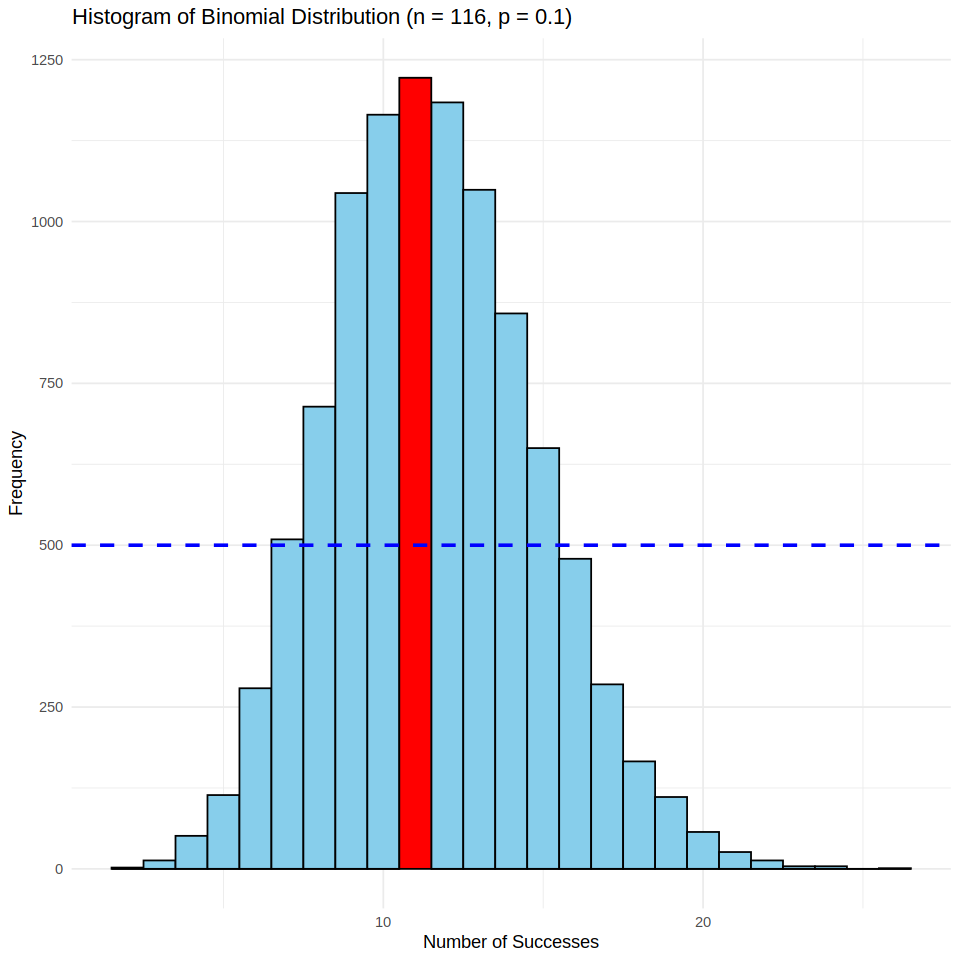

In [19]:
#Frequentist approach

p0 <- 0.1
n <- 116
sample_size <- 10000 

binom_sample <- rbinom(sample_size, n, p0)

binom_data <- data.frame(counts = binom_sample)

horizontal_line_value <- 0.05* sample_size

ggplot(binom_data, aes(x = counts)) +
  geom_histogram(binwidth = 1, aes(fill = (counts == 11)), color = "black") +
  scale_fill_manual(values = c("FALSE" = "skyblue", "TRUE" = "red")) +
  labs(title = "Histogram of Binomial Distribution (n = 116, p = 0.1)",
       x = "Number of Successes",
       y = "Frequency") +
  theme_minimal() +
  theme(legend.position = "none") +
  geom_hline(yintercept = 0.05* sample_size, linetype = "dashed", color = "blue", size = 1) # Add horizontal line

# It lies in the acceptance region, so we cannot reject the null hypothesis. Also

z <- (p_freq - p0) / sqrt(p0 * (1 - p0) / n)
p_value <- 2 * (1 - pnorm(abs(z)))

if (p_value < 0.05) {
  cat("The p-value is", p_value * 100, "%, which is less than the 5% threshold.", # nolinter
      "\nThus, we can reject the null hypothesis based on the frequentist analysis.\n") # nolinter
} else {
  cat("The p-value is", p_value * 100, "%, which is more than the 5% threshold.", # nolinter
      "\nThus, we cannot reject the null hypothesis based on the frequentist analysis.\n") # nolinter
}

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


95% credibility interval is ( 0.05 ; 0.151 ) 


Warning message:
“Removed 750 rows containing missing values or values outside the scale range
(`geom_line()`).”


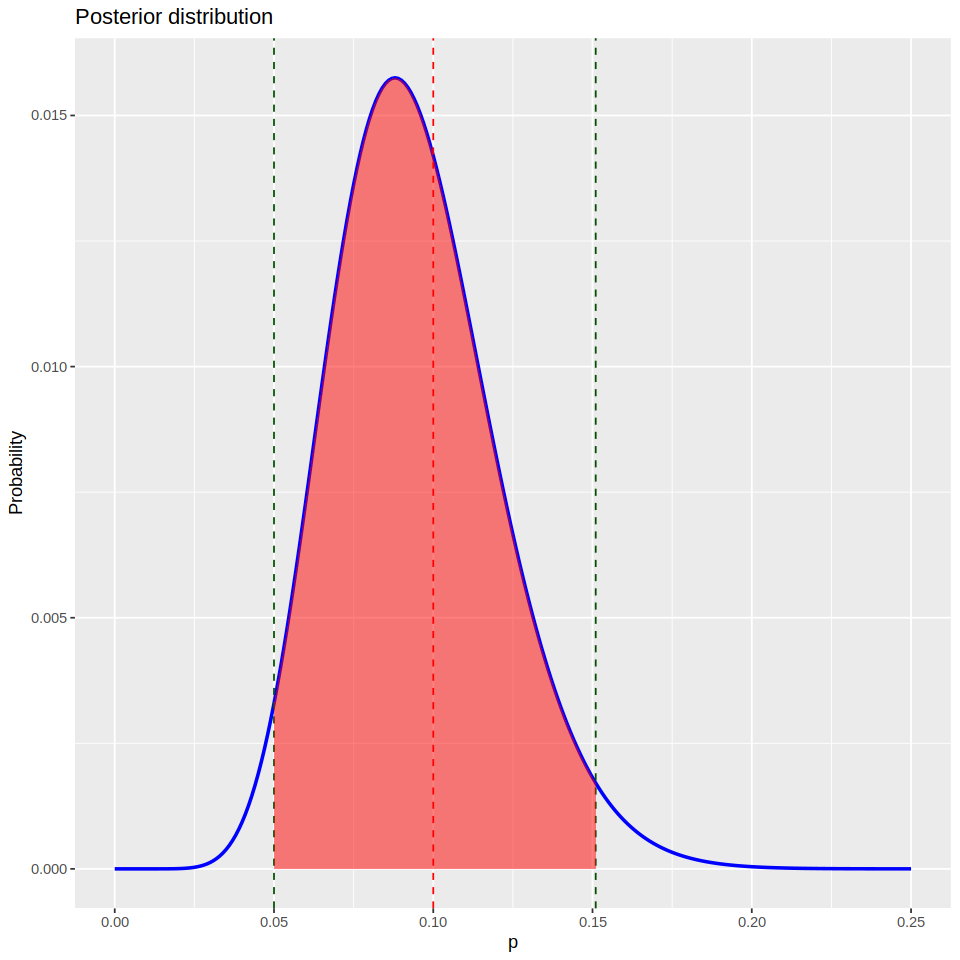

In [20]:
# Bayesian approach
# We compute a (1 − α) × 100% credible interval for p
# if p0 lies inside the interval, we do not reject the null hypothesis, H0; if it is outside,
# we reject H0

quantiles <- wtd.quantile(p, beta_post, c(0.025, 0.975), normwt = TRUE)

cat("95% credibility interval is (", quantiles[1], ";", quantiles[2], ")", "\n")

ggplot(data = data.frame(p, beta_post), aes(x = p, y = beta_post)) +
  geom_line(color = "blue", linewidth = 1) +
  geom_vline(xintercept = quantiles[1],
             linetype = "dashed", color = "#035003") +
  geom_vline(xintercept = quantiles[2],
             linetype = "dashed", color = "#035003") +

  geom_ribbon(data = subset(data.frame(p, beta_post),
                            p >= (quantiles[1]) & p <= (quantiles[2])),
              aes(ymin = 0, ymax = beta_post),
              fill = "red", alpha = 0.5) +
  labs(title = "Posterior distribution ",
       x = "p",
       y = "Probability")+
  xlim(c(0,0.25)) +
  geom_vline(xintercept = p0,
           linetype = "dashed", color = "red")

# It lies in the acceptance region, so we cannot reject the null hypothesis.

A new measurement, performed one month later on $n = 165$ water samples, gives $y = 9$ high bacter X level

(e) Find the frequentist estimator for $p$

In [21]:
n1 <- 165
y1 <- 9

p_freq <- y1/n1 

cat("The frequentist estimato for p is", p_freq * 100, "% \n")

The frequentist estimato for p is 5.454545 % 


(f) Find a bayesian estimator for $p$, assuming both a $Beta(1, 10)$ prior for $p$, and assuming the posterior
probability of the older measurement as the prior for the new one.

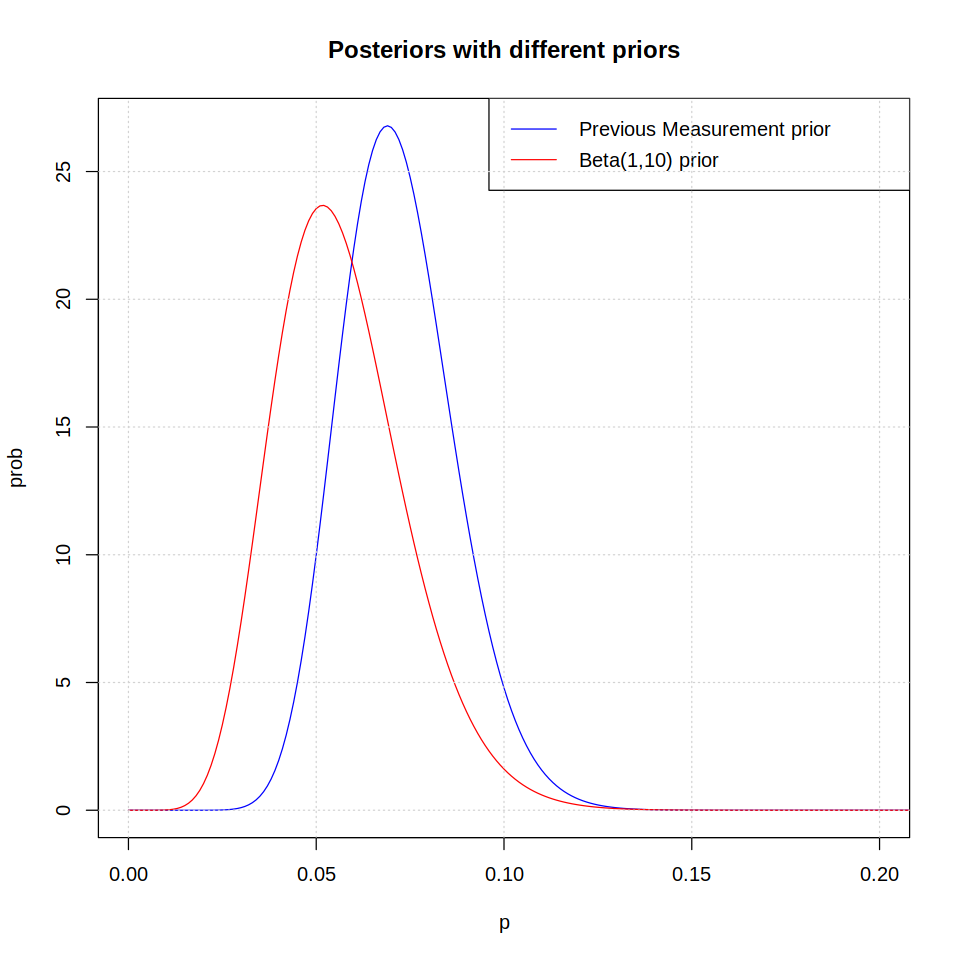

In [22]:
p <- seq(0, 1, 0.001)

# assuming beta(1,10)

beta_prior <- dbeta(p, a, b)
beta_post_1 <- dbeta(p, a + y1, b + n1 - y1)

# assuming older measurement prior

beta_prior <- dbeta(p, a_prime, b_prime)
beta_post_2 <- dbeta(p, a_prime + y1, b_prime + n1 - y1)

plot(p, beta_post_2, type = "l", col = "blue", xlab = "p", xlim = c(0, 0.2), ylab = "prob", main = "Posteriors with different priors")
lines(p, beta_post_1, type = "l", col = "red", xlab = "p", ylab = "prob", main = "Posterior with Beta prior")
legend("topright", legend = c("Previous Measurement prior", "Beta(1,10) prior"),col = c("blue", "red"), lty=1)
grid()

(g) Find the bayesian estimator for $p$, the posterior mean and variance, and a 95% credible interval
(h) test the hypotesis

$H_0 : p = 0.1$ versus $H_1 : p \neq 0.1$

at 5% level of significance with both the frequentist and bayesian approach



In [23]:
# for beta_post_1
a_prime_1 <- a + y1
b_prime_1 <- b + n1 - y1
mean_bayes_1 <- a_prime_1/(a_prime_1 + b_prime_1)
variance_bayes_1 <- (1/(n1+2))**2 * n1 * p_freq * (1-p_freq)
quantiles_1 <- wtd.quantile(p, beta_post_1, c(0.025, 0.975), normwt = TRUE)

cat("With Beta(1,10) prior, the bayesian mean is", mean_bayes_1, '\n')
cat("With Beta(1,10) prior, the bayesian variance is", variance_bayes_1, '\n')
cat("With Beta(1,10) 95% credibility interval is (", quantiles_1[1], ";", quantiles_1[2], ")", "\n")

# for beta_post_2
a_prime_2 <- a_prime + y1
b_prime_2 <- b_prime + n1 - y1
mean_bayes_2 <- a_prime_2/(a_prime_2 + b_prime_2)
variance_bayes_2 <- (1/(n1+2))**2 * n1 * p_freq * (1-p_freq)
quantiles_2 <- wtd.quantile(p, beta_post_2, c(0.025, 0.975), normwt = TRUE)


cat("With previous measurement prior, the bayesian mean is", mean_bayes_2, '\n')
cat("With previous measurement prior, the bayesian variance is", variance_bayes_2, '\n')
cat("With previous measurementprior 95% credibility interval is (", quantiles_2[1], ";", quantiles_2[2], ")", "\n")

Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


With Beta(1,10) prior, the bayesian mean is 0.05681818 
With Beta(1,10) prior, the bayesian variance is 0.0003051056 
With Beta(1,10) 95% credibility interval is ( 0.028 ; 0.09525 ) 


Warning message in regularize.values(x, y, ties, missing(ties), na.rm = na.rm):
“collapsing to unique 'x' values”


With previous measurement prior, the bayesian mean is 0.07191781 
With previous measurement prior, the bayesian variance is 0.0003051056 
With previous measurementprior 95% credibility interval is ( 0.045 ; 0.104 ) 


Warning message:
“Removed 850 rows containing missing values or values outside the scale range
(`geom_line()`).”
Warning message:
“Removed 850 rows containing missing values or values outside the scale range
(`geom_line()`).”


Concerning the posterior with the Beta prior, p0 lies outside the acceptance region, so we can reject the null hypothesis  
Concerning the posterior with the previous measurement prior, p0 lies inside the acceptance region, so we cannot reject the null hypothesis  


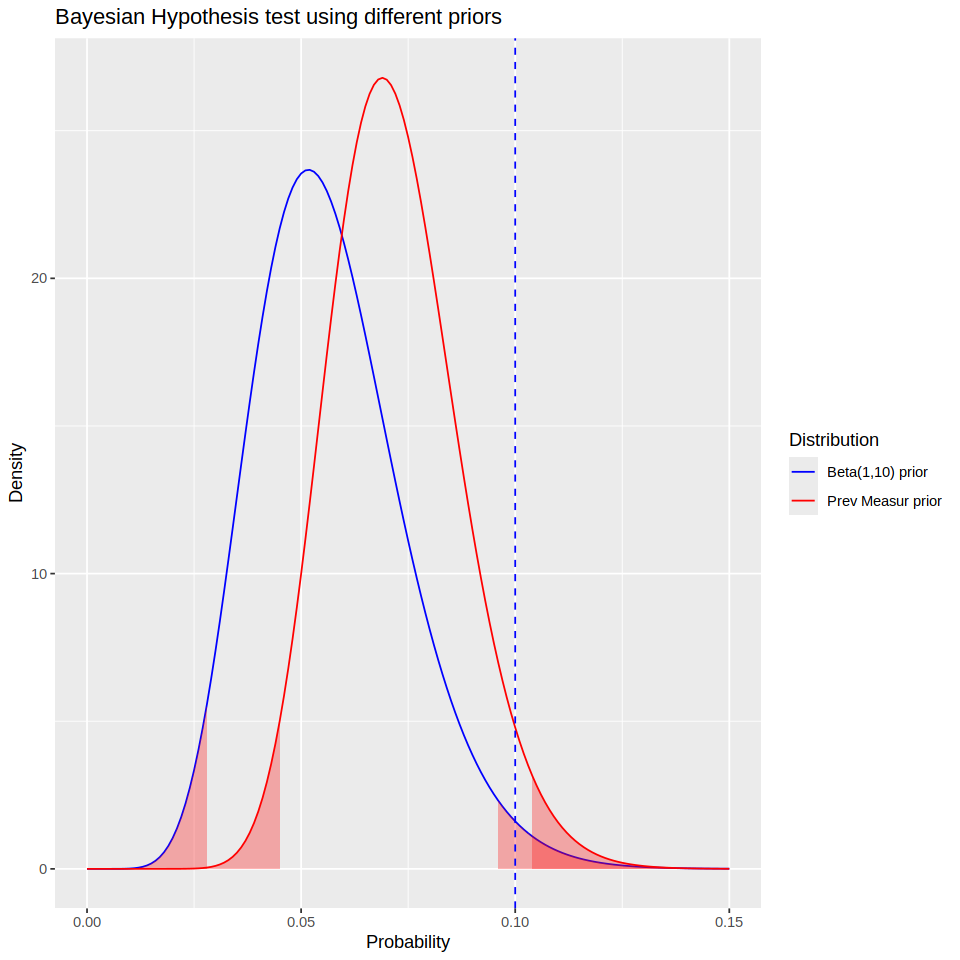

In [25]:
density1 <- beta_post_1
density2 <- beta_post_2

# Create a data frame for plotting
df <- data.frame(p, density1, density2)

# Plot the densities with ggplot2
ggplot(df, aes(x = p)) +
  # Add density line for distribution 1
  xlim(0, 0.15) +
  geom_line(aes(y = density1, color = "Beta(1,10) prior")) +
  # Add density line for distribution 2
  geom_line(aes(y = density2, color = "Prev Measur prior")) +
  # Shade the area under the curve from p = 0.15 onwards for distribution 1
  geom_ribbon(data = subset(df, p >= quantiles_1[2]), aes(ymin = 0, ymax = density1), fill = "red", alpha = 0.3) +
  # Shade the area under the curve from p = 0.15 onwards for distribution 2
  geom_ribbon(data = subset(df, p <= quantiles_1[1]), aes(ymin = 0, ymax = density1), fill = "red", alpha = 0.3) +
geom_ribbon(data = subset(df, p >= quantiles_2[2]), aes(ymin = 0, ymax = density2), fill = "red", alpha = 0.3) +
  # Shade the area under the curve from p = 0.15 onwards for distribution 2
  geom_ribbon(data = subset(df, p <= quantiles_2[1]), aes(ymin = 0, ymax = density2), fill = "red", alpha = 0.3) +

  scale_color_manual(values = c("blue", "red")) + # set color for mean lines
  scale_fill_manual(values = c("blue", "red")) +
geom_vline(aes(xintercept = 0.1), linetype = "dashed", color = "blue") +

  # Set plot labels and title
  labs(x = "Probability", y = "Density", color = "Distribution") +
  ggtitle("Bayesian Hypothesis test using different priors")

# Bayesian test hypothesis:

cat("Concerning the posterior with the Beta prior, p0 lies outside the acceptance region, so we can reject the null hypothesis ",'\n')
cat("Concerning the posterior with the previous measurement prior, p0 lies inside the acceptance region, so we cannot reject the null hypothesis ",'\n')



In [26]:
# Frequentist hypothesis test

p0 <- 0.1

z <- (p_freq - p0) / sqrt(p0 * (1 - p0) / n1)
p_value <- 2 * (1 - pnorm(abs(z)))

if (p_value < 0.05) {
  cat("The p-value is", p_value * 100, "%, which is less than the 5% threshold.", # nolinter
      "\nThus, we can reject the null hypothesis based on the frequentist analysis.\n") # nolinter
} else {
  cat("The p-value is", p_value * 100, "%, which is more than the 5% threshold.", # nolinter
      "\nThus, we cannot reject the null hypothesis based on the frequentist analysis.\n") # nolinter
}

The p-value is 5.162503 %, which is more than the 5% threshold. 
Thus, we cannot reject the null hypothesis based on the frequentist analysis.


# Exercise 4


Analyze the data of Exercise 3 and solve points (b) and (c) using a Markov Chain Monte Carlo using $\textbf{stan}$

In [27]:
library(rstan)

In [28]:
data_list <- list(
  n = 116,
  y = 11
)

In [29]:
model_string_bacter <- "data {
  int n;  // Total number of samples
  int y;  // Number of samples with high bacter X level
}

parameters {
  real p;  // Probability of high bacter X level
}

model {
  p ~ beta(1, 10);  // Beta(1, 10) prior for p
  y ~ binomial(n, p);  // Likelihood function
}"

writeLines(model_string_bacter, "model_bacter.stan")

In [30]:
bacter_model <- stan_model("model_bacter.stan")

In [31]:
fit <- sampling(
  object = bacter_model,
  data = data_list,
  seed = 123,
  chains = 4,
  iter = 1000,
  warmup = 200,
  thin = 1
)

code for methods in class “Rcpp_stan_fit4model20617dc27a38_” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)

code for methods in class “Rcpp_stan_fit4model20617dc27a38_” was not checked for suspicious field assignments (recommended package ‘codetools’ not available?)




SAMPLING FOR MODEL 'anon_model' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 9e-06 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 0.09 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:   1 / 1000 [  0%]  (Warmup)
Chain 1: Iteration: 100 / 1000 [ 10%]  (Warmup)
Chain 1: Iteration: 200 / 1000 [ 20%]  (Warmup)
Chain 1: Iteration: 201 / 1000 [ 20%]  (Sampling)
Chain 1: Iteration: 300 / 1000 [ 30%]  (Sampling)
Chain 1: Iteration: 400 / 1000 [ 40%]  (Sampling)
Chain 1: Iteration: 500 / 1000 [ 50%]  (Sampling)
Chain 1: Iteration: 600 / 1000 [ 60%]  (Sampling)
Chain 1: Iteration: 700 / 1000 [ 70%]  (Sampling)
Chain 1: Iteration: 800 / 1000 [ 80%]  (Sampling)
Chain 1: Iteration: 900 / 1000 [ 90%]  (Sampling)
Chain 1: Iteration: 1000 / 1000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 0.011 seconds (Warm-up)
Chain 1:                0.005 seconds (Sampling)
Chain 1:                0.016 secon

Warning message:
“There were 2 divergent transitions after warmup. See
https://mc-stan.org/misc/warnings.html#divergent-transitions-after-warmup
to find out why this is a problem and how to eliminate them.”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”


In [32]:
print(fit,pars = c("p"), probs = c(0.025, 0.975), digits = 4)

Inference for Stan model: anon_model.
4 chains, each with iter=1000; warmup=200; thin=1; 
post-warmup draws per chain=800, total post-warmup draws=3200.

    mean se_mean     sd   2.5%  97.5% n_eff  Rhat
p 0.0937   8e-04 0.0255 0.0494 0.1491  1011 1.003

Samples were drawn using NUTS(diag_e) at Fri May 31 14:59:39 2024.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


ci_level: 0.8 (80% intervals)

outer_level: 0.95 (95% intervals)



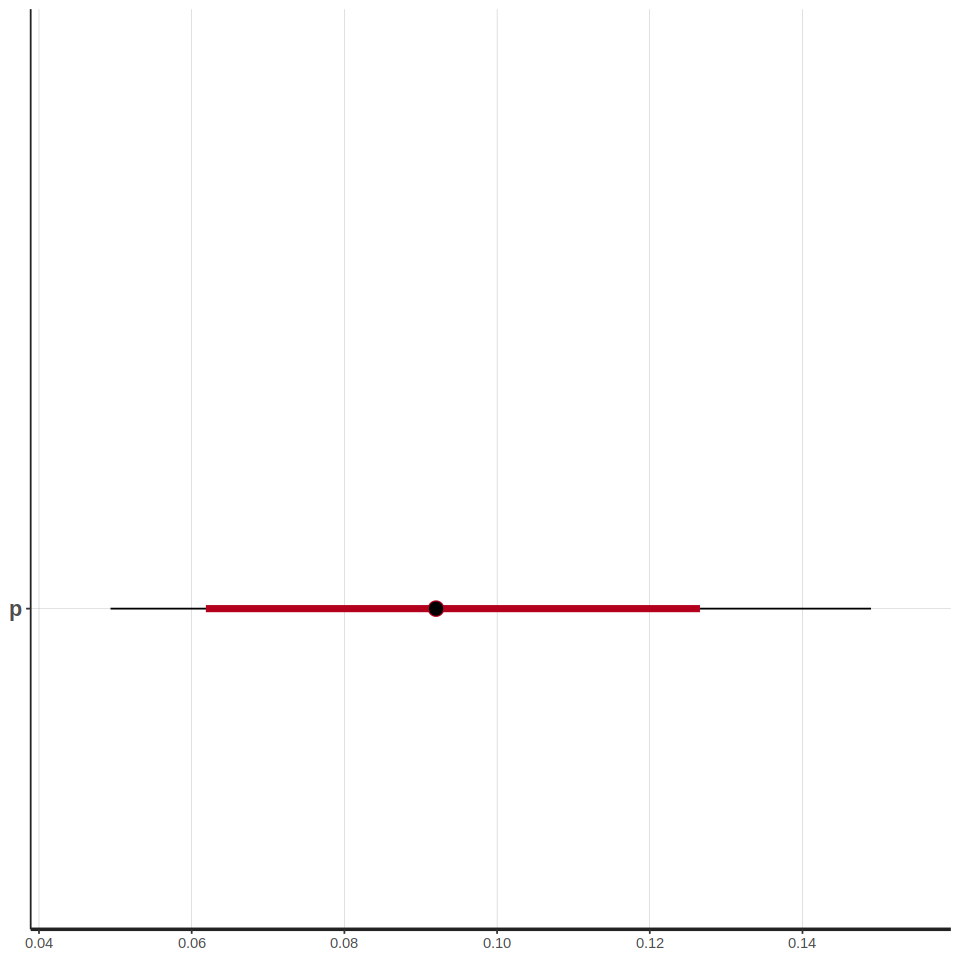

In [33]:
plot(fit ,pars=c("p"))


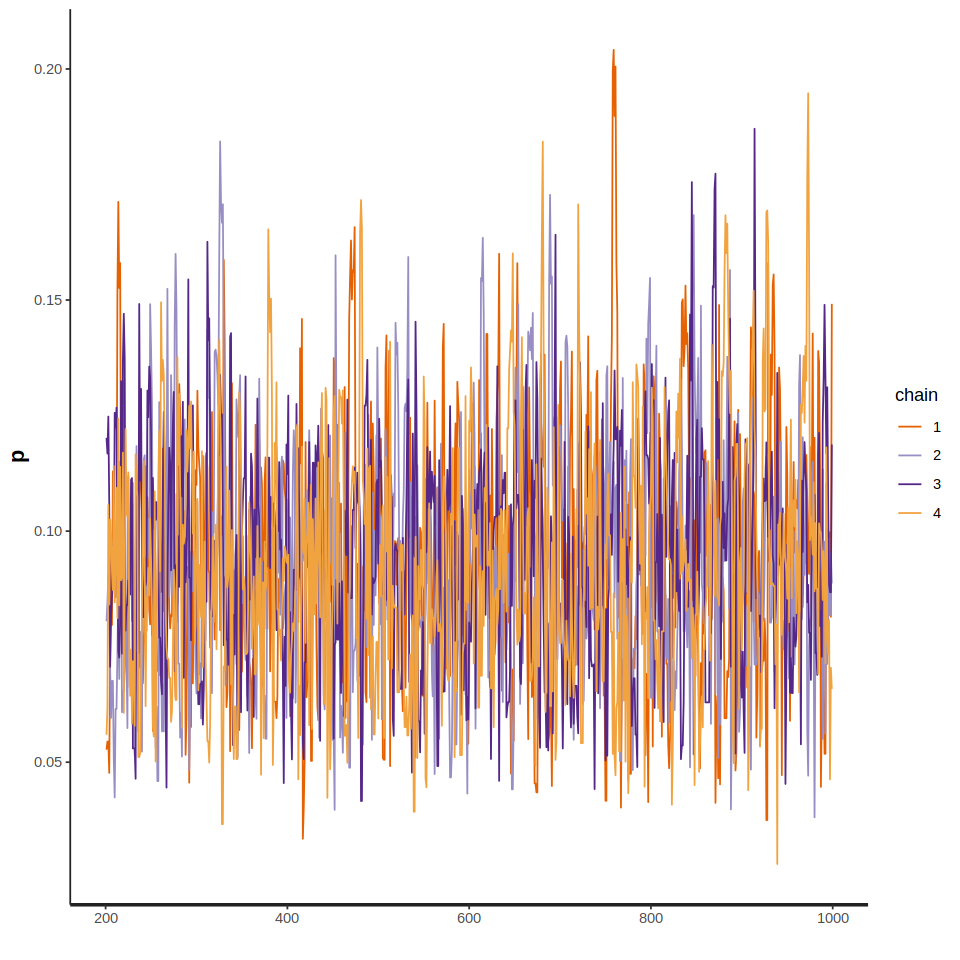

In [34]:
rstan::traceplot(fit,pars=c("p"))


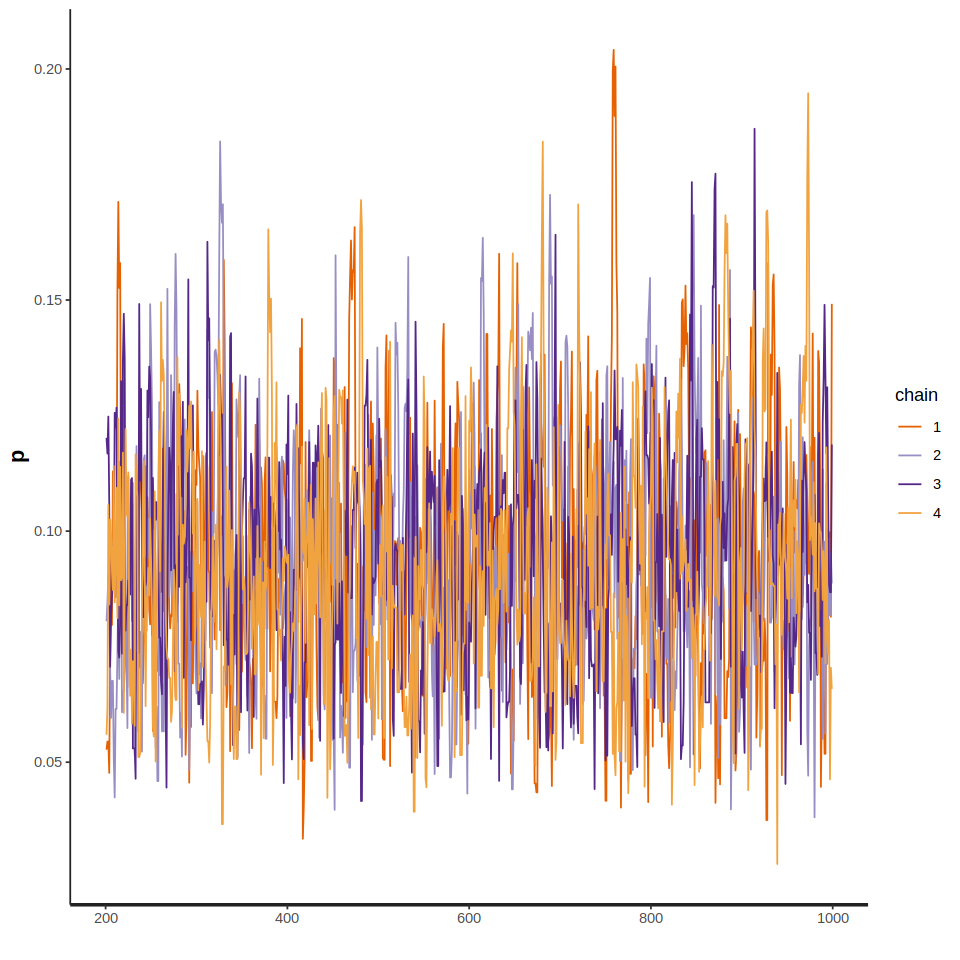

In [35]:
# alternatively
stan_trace(fit)

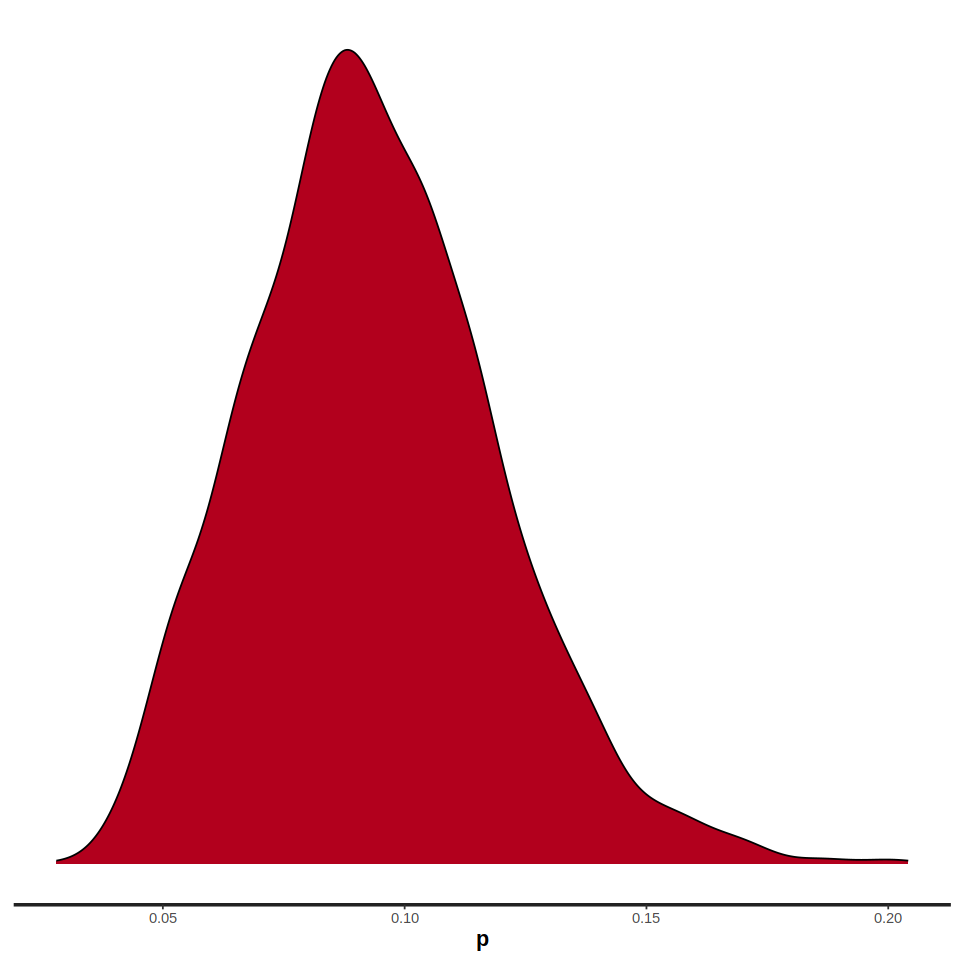

In [36]:
stan_dens(fit)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


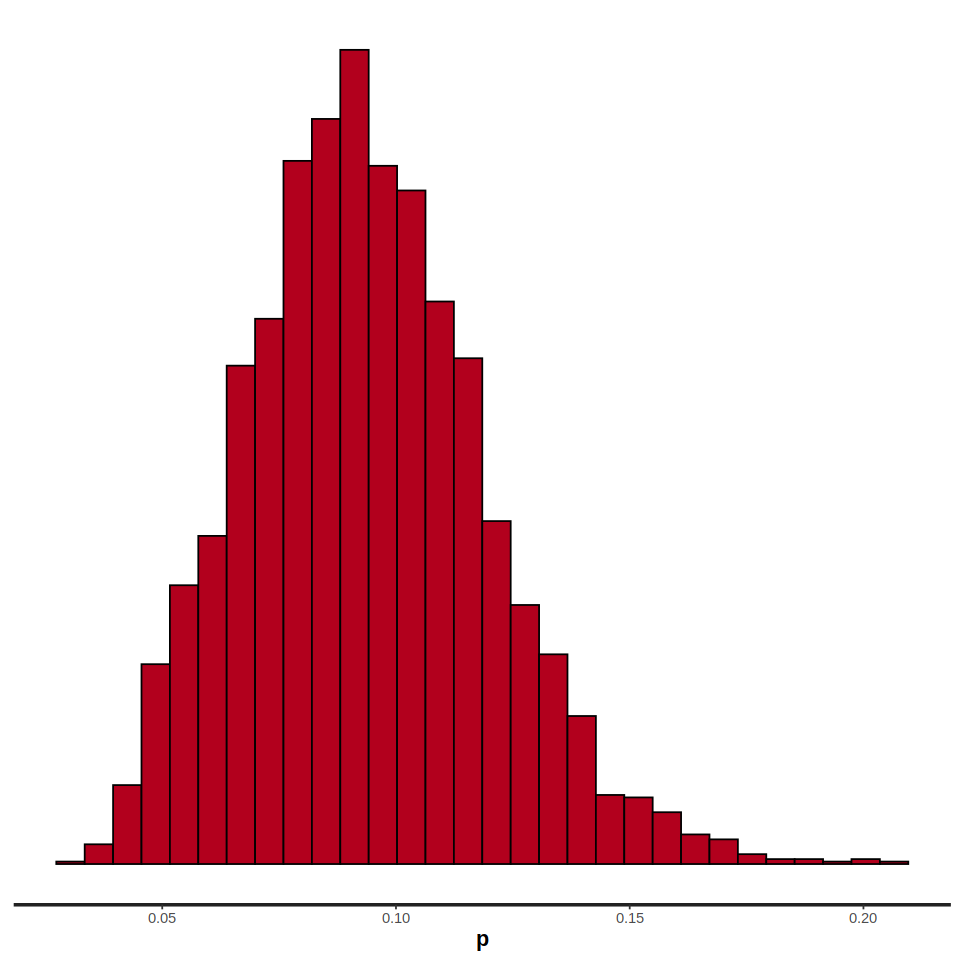

In [37]:
stan_hist(fit)

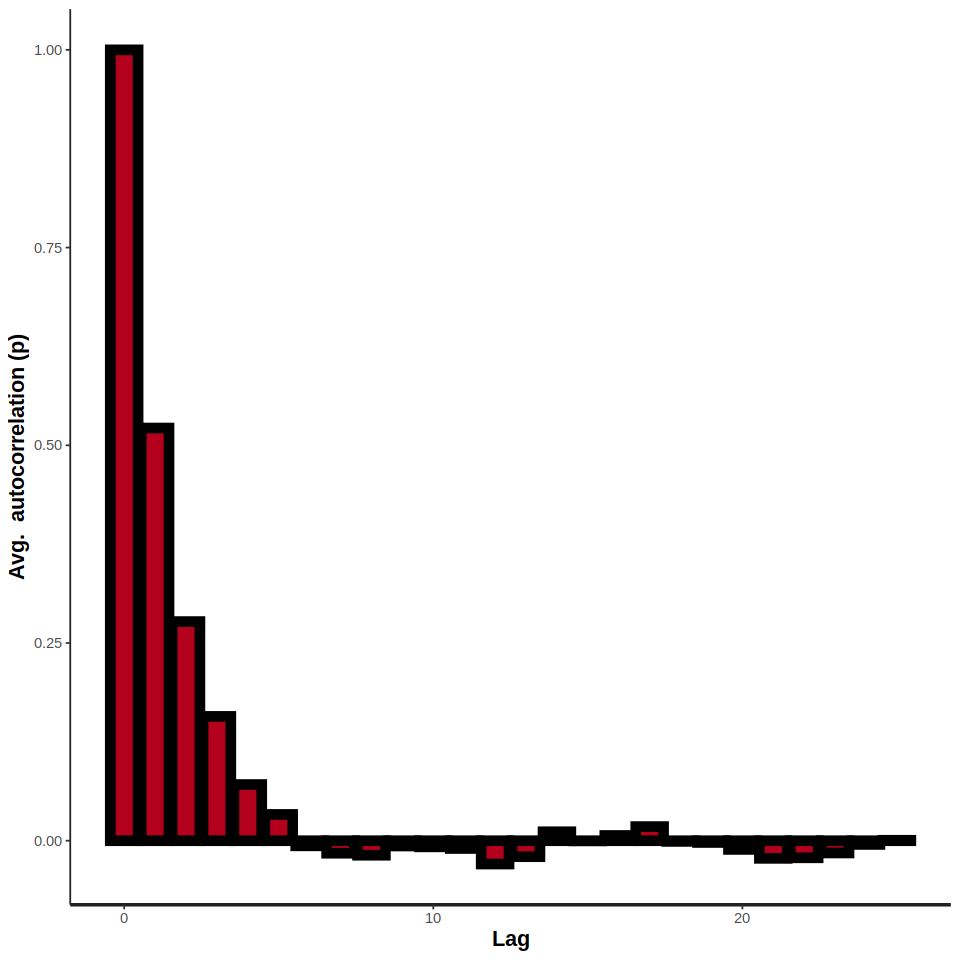

In [38]:
stan_ac(fit, pars = c("p"))

In [39]:
# stan_scat(fit,pars=c("p","p")) for correlations graphs